In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv("obesity_child_age.csv")

In [4]:
data.shape

(99, 6)

In [5]:
data.tail()

,index,Time,Age,Gender,PercentObese,SE
94,94,"[2005,2006]","[12,19]",F,17.3,-2.1
95,95,"[2007,2008]","[12,19]",F,16.8,-2.0
96,96,"[2009,2010]","[12,19]",F,17.1,-1.3
97,97,"[2011,2012]","[12,19]",F,20.7,-2.0
98,98,"[2013,2014]","[12,19]",F,21.4,-3.2


In [6]:
data.columns

Index(['index', 'Time', 'Age', 'Gender', 'PercentObese', 'SE'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         99 non-null     int64  
 1   Time          99 non-null     object 
 2   Age           99 non-null     object 
 3   Gender        99 non-null     object 
 4   PercentObese  99 non-null     float64
 5   SE            99 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [8]:
data.isnull().sum()

index           0
Time            0
Age             0
Gender          0
PercentObese    0
SE              0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data1 = data

In [11]:
#delete index row
data1.drop('index', axis=1, inplace=True)

In [12]:
#separating Time into StartYear and EndYear
#separating Age into MinAge and MaxAge
from sklearn.preprocessing import StandardScaler
# data['Time'] = data['Time'].apply(lambda x: [int(year) for year in x.strip('[]').split(',')])
# data['StartYear'] = data['Time'].apply(lambda x: x[0])
# data['EndYear'] = data['Time'].apply(lambda x: x[1])
# data.drop('Time', axis=1, inplace=True)

data1['StartYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[0]))
data1['EndYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[1]))
data1.drop('Time', axis=1, inplace=True)

# 1. Convert string representations of age ranges to separate minimum and maximum ages
# Extract minimum and maximum ages from the list
data1.Age = data1.Age.str.strip('[]')
data1[['MinAge', 'MaxAge']] = data1['Age'].str.extract("(\d+),(\d+)", expand=True).astype(int)
data1.drop('Age', axis=1, inplace=True)

In [13]:
#get dummies for gender column
gender = pd.get_dummies(data1.Gender)
data1 = data1.join(gender)
data1.drop('Gender', axis=1, inplace=True)
data1 = data1.replace(to_replace = [True,False],value = ['1','0'])

In [14]:
data1

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
94,17.3,-2.1,2005,2006,12,19,0,1,0
95,16.8,-2.0,2007,2008,12,19,0,1,0
96,17.1,-1.3,2009,2010,12,19,0,1,0
97,20.7,-2.0,2011,2012,12,19,0,1,0


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PercentObese  99 non-null     float64
 1   SE            99 non-null     float64
 2   StartYear     99 non-null     int64  
 3   EndYear       99 non-null     int64  
 4   MinAge        99 non-null     int32  
 5   MaxAge        99 non-null     int32  
 6   All           99 non-null     uint8  
 7   F             99 non-null     uint8  
 8   M             99 non-null     uint8  
dtypes: float64(2), int32(2), int64(2), uint8(3)
memory usage: 4.3 KB


In [16]:
data1['M']=data1['M'].astype(str).astype(int)
data1['F']=data1['F'].astype(str).astype(int)
data1['All']=data1['All'].astype(str).astype(int)

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PercentObese  99 non-null     float64
 1   SE            99 non-null     float64
 2   StartYear     99 non-null     int64  
 3   EndYear       99 non-null     int64  
 4   MinAge        99 non-null     int32  
 5   MaxAge        99 non-null     int32  
 6   All           99 non-null     int32  
 7   F             99 non-null     int32  
 8   M             99 non-null     int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 5.2 KB


In [18]:
data1

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
94,17.3,-2.1,2005,2006,12,19,0,1,0
95,16.8,-2.0,2007,2008,12,19,0,1,0
96,17.1,-1.3,2009,2010,12,19,0,1,0
97,20.7,-2.0,2011,2012,12,19,0,1,0


In [19]:
from ctgan import CTGAN

# initialize the CTGAN model
model = CTGAN()

# fit the model to the original data
model.fit(data1)

# generate synthetic data
synthetic_data = model.sample(len(data1))
synthetic_data1 = model.sample(len(data1))
synthetic_data2 = model.sample(len(data1))
synthetic_data3 = model.sample(len(data1))
synthetic_data4 = model.sample(len(data1))

# save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)
synthetic_data1.to_csv('synthetic_data1.csv', index=False)
synthetic_data2.to_csv('synthetic_data2.csv', index=False)
synthetic_data3.to_csv('synthetic_data3.csv', index=False)
synthetic_data4.to_csv('synthetic_data4.csv', index=False)

In [20]:
synthetic_data.head()

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,19.265012,-0.503904,2002,2025,15,3,1,1,0
1,8.348556,-1.391195,2001,1981,13,22,0,1,0
2,15.462878,-0.403382,1996,2022,15,19,1,0,0
3,16.010032,-1.300789,1993,2013,3,22,0,0,0
4,7.881164,-1.115101,1993,1996,5,21,0,1,1


In [21]:
data2 = pd.concat([data1,synthetic_data], ignore_index=True)
data2 = pd.concat([data2,synthetic_data1], ignore_index=True)
data2 = pd.concat([data2,synthetic_data2], ignore_index=True)
data2 = pd.concat([data2,synthetic_data3], ignore_index=True)
data2 = pd.concat([data2,synthetic_data4], ignore_index=True)

In [22]:
data2

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.000000,-0.600000,1971,1974,2,5,1,0,0
1,5.000000,-0.600000,1976,1980,2,5,1,0,0
2,7.200000,-0.700000,1988,1994,2,5,1,0,0
3,10.300000,-1.700000,1999,2000,2,5,1,0,0
4,10.600000,-1.800000,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
589,8.783830,-0.784490,2017,2005,8,6,0,0,1
590,16.899273,-0.796873,2008,2014,3,13,0,1,0
591,14.033298,-0.361444,2006,2014,3,14,0,1,0
592,5.569053,-0.673971,1997,2012,2,13,0,0,0


In [23]:
data2.to_csv('data2.csv', index=False)

<Axes: >

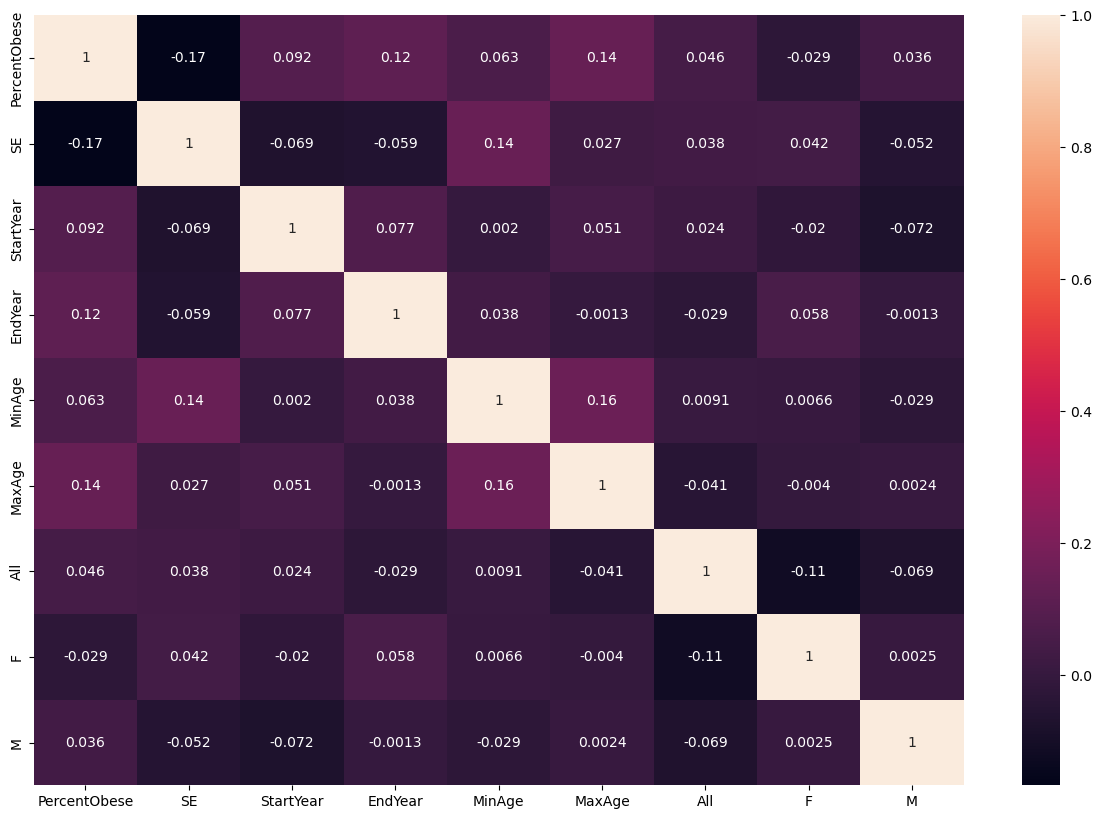

In [24]:
#correlation map
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot = True)

In [25]:
# 3. Standardize the continuous-valued features 'Age' and 'PercentObese'
continuous_features = ['PercentObese', 'MinAge', 'MaxAge']
scaler = StandardScaler()
data2[continuous_features] = scaler.fit_transform(data2[continuous_features])

In [26]:
from sklearn.model_selection import train_test_split

X=data2.drop(['PercentObese','SE'],axis=1)
Y=data2['PercentObese']


In [42]:
data2

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,-1.345192,-0.600000,1971,1974,-1.146897,-1.488192,1,0,0
1,-1.345192,-0.600000,1976,1980,-1.146897,-1.488192,1,0,0
2,-0.959319,-0.700000,1988,1994,-1.146897,-1.488192,1,0,0
3,-0.415589,-1.700000,1999,2000,-1.146897,-1.488192,1,0,0
4,-0.362970,-1.800000,2001,2002,-1.146897,-1.488192,1,0,0
...,...,...,...,...,...,...,...,...,...
589,-0.681520,-0.784490,2017,2005,0.191963,-1.325185,0,0,1
590,0.741902,-0.796873,2008,2014,-0.923753,-0.184137,0,1,0
591,0.239219,-0.361444,2006,2014,-0.923753,-0.021131,0,1,0
592,-1.245382,-0.673971,1997,2012,-1.146897,-0.184137,0,0,0


In [27]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_train, Y_train, test_size=0.50, random_state=42)
train_data = X_train.join(Y_train)
test_data = X_test.join(Y_test)
valid_data = X_valid.join(Y_valid)

# Print the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Testing set size:", len(X_test))



Training set size: 475
Validation set size: 237
Testing set size: 238


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the train set
X_train = scaler.fit_transform(X_train)

# Scale the test set
X_test = scaler.fit_transform(X_test)

# Scale the validation set
X_valid = scaler.fit_transform(X_valid)

array([[<Axes: title={'center': 'StartYear'}>,
        <Axes: title={'center': 'EndYear'}>,
        <Axes: title={'center': 'MinAge'}>],
       [<Axes: title={'center': 'MaxAge'}>,
        <Axes: title={'center': 'All'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'M'}>,
        <Axes: title={'center': 'PercentObese'}>, <Axes: >]], dtype=object)

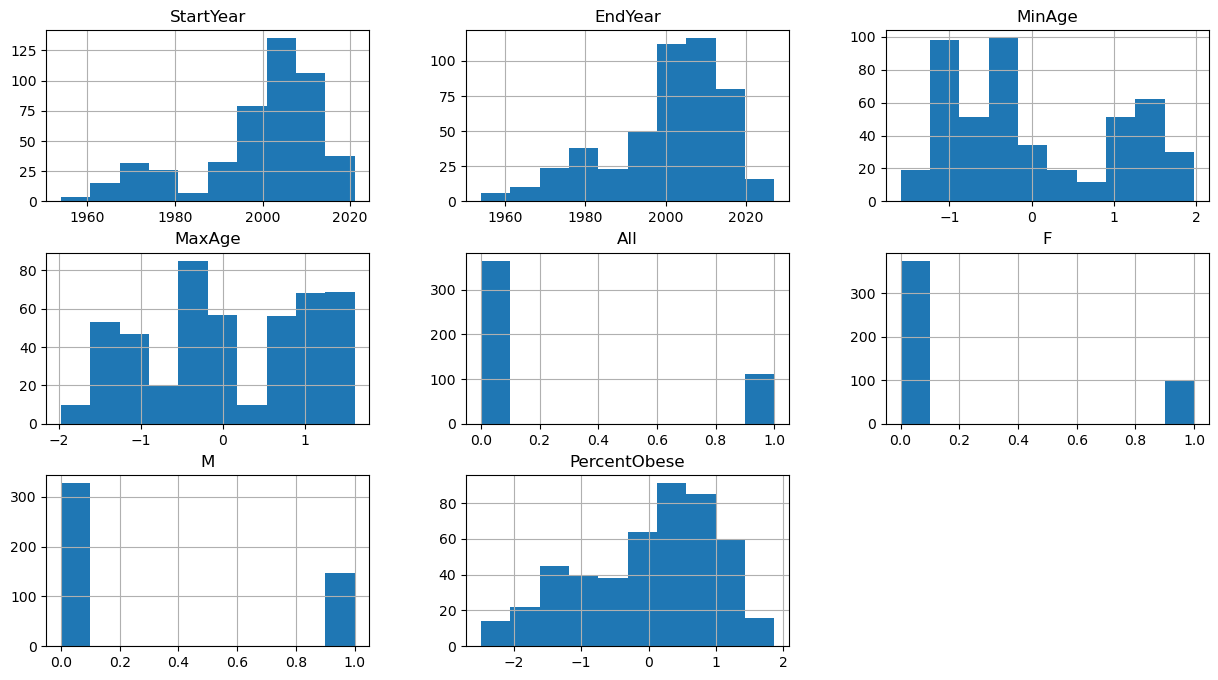

In [29]:
train_data.hist(figsize=(15,8))

ANN algorithm

In [120]:
# 1st model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


#Initialize
model1=Sequential()

# input layer
model1.add(Dense(12,activation='relu', input_shape=(7,)))
# hidden layer
model1.add(Dense(12, activation='relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dense(36, activation='relu'))


# output layer
model1.add(Dense(1, activation='linear'))



In [121]:
# 2nd model


#Initialize
model2=Sequential()

# input layer
model2.add(Dense(12,activation='relu', input_shape=(7,)))
# hidden layer
model2.add(Dense(36, activation='relu'))
model2.add(Dense(48, activation='relu'))
model2.add(Dense(36, activation='relu'))



# output layer
model2.add(Dense(1, activation='linear'))



In [122]:
# 3rd model


#Initialize
model3=Sequential()

# input layer
model3.add(Dense(12,activation='relu', input_shape=(7,)))
# hidden layer
model3.add(Dense(12, activation='relu'))
model3.add(Dense(24, activation='relu'))
model3.add(Dense(12, activation='relu'))

# output layer
model3.add(Dense(1, activation='linear'))



In [124]:
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model1.compile(loss='mean_squared_error', optimizer=optimizer)
histories = []                   
history = model1.fit(X_train, Y_train,epochs=100, batch_size=10, verbose=1, validation_data=(X_valid, Y_valid))
histories.append(history)


Epoch 1/100
48/48 [==============================] - 1s 8ms/step - loss: 1.0291 - val_loss: 0.9967
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 1.0058 - val_loss: 0.9736
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9797 - val_loss: 0.9524
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9689 - val_loss: 0.9557
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9519 - val_loss: 0.9527
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9591 - val_loss: 0.9308
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9484 - val_loss: 0.9346
Epoch 8/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9391 - val_loss: 0.9204
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9261 - val_loss: 0.8640
Epoch 10/100
48/48 [==============================] - 0s 4ms/step - loss: 0.8997 - val_loss: 0.8985
Epoch 11/

In [125]:
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model2.compile(loss='mean_squared_error', optimizer=optimizer)
history = model2.fit(X_train, Y_train,epochs=100, batch_size=10, verbose=1, validation_data=(X_valid, Y_valid))
histories.append(history)

Epoch 1/100
48/48 [==============================] - 1s 9ms/step - loss: 1.0494 - val_loss: 1.0213
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9983 - val_loss: 0.9920
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 1.0138 - val_loss: 0.9927
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9944 - val_loss: 0.9517
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9767 - val_loss: 0.9277
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9600 - val_loss: 0.9574
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9613 - val_loss: 0.9398
Epoch 8/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9394 - val_loss: 0.8662
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9113 - val_loss: 0.8426
Epoch 10/100
48/48 [==============================] - 0s 4ms/step - loss: 0.8911 - val_loss: 0.8397
Epoch 11/

In [126]:
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model3.compile(loss='mean_squared_error', optimizer=optimizer)

history = model3.fit(X_train, Y_train,epochs=100, batch_size=10, verbose=1, validation_data=(X_valid, Y_valid))
histories.append(history)

Epoch 1/100
48/48 [==============================] - 1s 8ms/step - loss: 1.0283 - val_loss: 1.0121
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9990 - val_loss: 0.9764
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9760 - val_loss: 0.9682
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9611 - val_loss: 0.9290
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9516 - val_loss: 0.9387
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.9407 - val_loss: 0.9053
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.9291 - val_loss: 0.8703
Epoch 8/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9091 - val_loss: 0.8812
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 0.9289 - val_loss: 0.8532
Epoch 10/100
48/48 [==============================] - 0s 5ms/step - loss: 0.8942 - val_loss: 0.8729
Epoch 11/

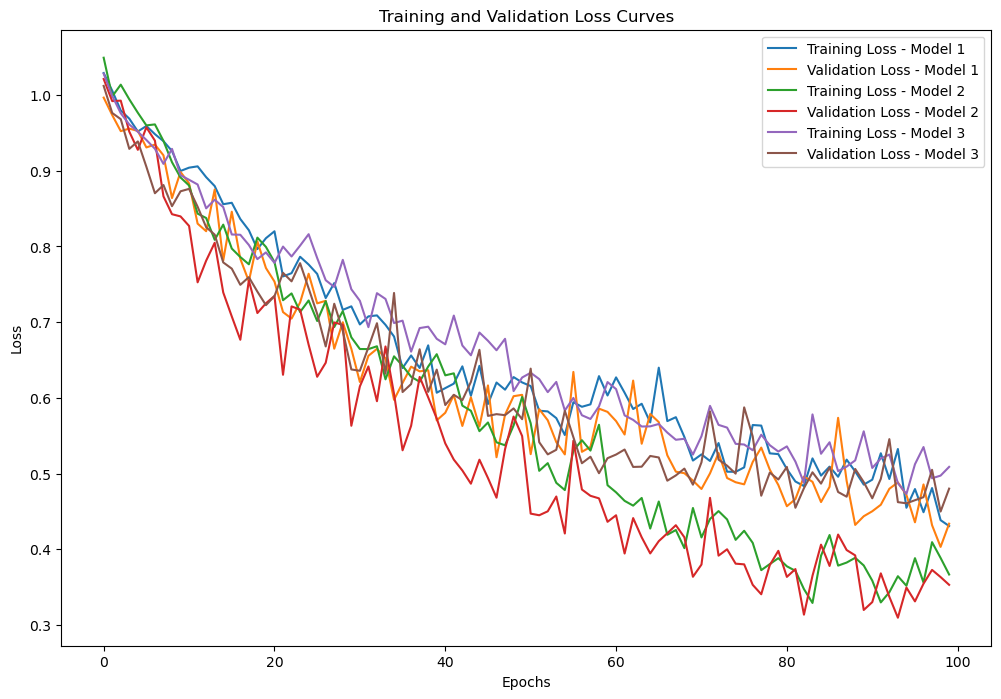

In [127]:
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label='Training Loss - Model {}'.format(i+1))
    plt.plot(history.history['val_loss'], label='Validation Loss - Model {}'.format(i+1))

plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

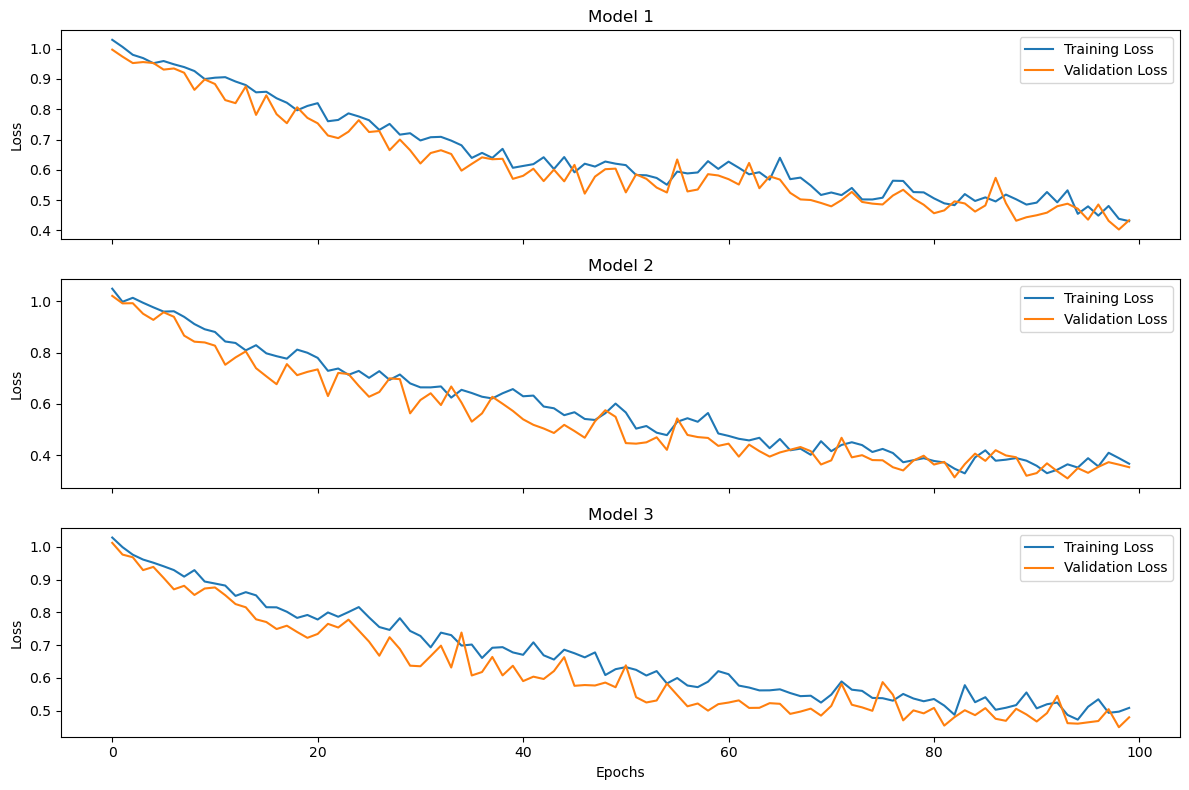

In [128]:


import matplotlib.pyplot as plt

# Check if there is only one model
if len(histories) == 1:
    # Create a single subplot for the model
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(histories[0].history['loss'], label='Training Loss')
    ax.plot(histories[0].history['val_loss'], label='Validation Loss')
    ax.set_title('Model 1')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
else:
    # Create subplots for each model
    fig, axs = plt.subplots(len(histories), 1, figsize=(12, 8), sharex=True)

    # Plot the loss curves for each model
    for i, history in enumerate(histories):
        axs[i].plot(history.history['loss'], label='Training Loss')
        axs[i].plot(history.history['val_loss'], label='Validation Loss')
        axs[i].set_title('Model {}'.format(i+1))
        axs[i].set_ylabel('Loss')
        axs[i].legend()

    # Set common x-axis label
    axs[-1].set_xlabel('Epochs')

    # Adjust spacing between subplots
    plt.tight_layout()

# Display the plot
plt.show()



In [129]:

# Make predictions on the test set
models = [model1, model2, model3]
for i, model in enumerate(models):
    print("Model", i+1)
    
    # Make predictions on the test set
    Y_pred = model.predict(X_valid)
    # print(y_pred[:10])
    
    
    preddf = pd.DataFrame(Y_pred, columns=['Predicted Obesity Level'])

    # Print the DataFrame
    print(preddf.head(10))
    print()


Model 1
8/8 [==============================] - 0s 2ms/step
   Predicted Obesity Level
0                -0.426760
1                 1.106736
2                -0.299416
3                -0.234574
4                -0.335851
5                 1.062690
6                -2.363824
7                -1.011307
8                -0.299416
9                 0.656292

Model 2
8/8 [==============================] - 0s 4ms/step
   Predicted Obesity Level
0                -0.971842
1                 1.072770
2                 0.132606
3                 0.584533
4                -1.084348
5                 1.769879
6                -1.269172
7                -0.875015
8                -0.420146
9                 0.966435

Model 3
8/8 [==============================] - 0s 4ms/step
   Predicted Obesity Level
0                 0.089465
1                 0.732233
2                 0.459993
3                 0.712997
4                -0.856554
5                -0.462779
6                -1.659302
7          

In [130]:
# Model evaluations

models = [model1, model2, model3] 
for i, model in enumerate(models):
    print("Model", i+1)

    
    # Perform evaluation on the validation set
    loss = model.evaluate(X_valid, Y_valid)
    
    # Print the evaluation results
    print("Test Loss:", loss)
    print()


Model 1
8/8 [==============================] - 0s 5ms/step - loss: 0.4337
Test Loss: 0.43372032046318054

Model 2
8/8 [==============================] - 0s 4ms/step - loss: 0.3529
Test Loss: 0.35292941331863403

Model 3
8/8 [==============================] - 0s 2ms/step - loss: 0.4800
Test Loss: 0.4800194799900055



In [40]:
# Model tuning
# model 2 is chosen


In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam, RMSprop

# Define the function to create the model
def create_model(optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(12, activation='relu', input_shape=(7,)))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = optimizer(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create the KerasRegressor object
bestmodel = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'batch_size': [32, 64],
    'optimizer': [Adam, RMSprop],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=bestmodel, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, Y_train)

# Print the best hyperparameters and evaluation score
print("Best Hyperparameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

# Convert the cv_results_ to a DataFrame
results_df = pd.DataFrame(grid_result.cv_results_)

# Select the desired columns for the table
columns = ['param_batch_size', 'param_optimizer', 'param_learning_rate', 'mean_test_score', 'std_test_score']

# Print the table
print(results_df[columns])


C:\Users\Yourisha\AppData\Local\Temp\ipykernel_12196\2850557979.py:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  bestmodel = KerasRegressor(build_fn=create_model, verbose=0)


Best Hyperparameters:  {'batch_size': 64, 'learning_rate': 0.001, 'optimizer': <class 'keras.optimizers.legacy.rmsprop.RMSprop'>}
Best Score:  -0.9944471915562948
   param_batch_size                                    param_optimizer  \
0                32        <class 'keras.optimizers.legacy.adam.Adam'>   
1                32  <class 'keras.optimizers.legacy.rmsprop.RMSprop'>   
2                32        <class 'keras.optimizers.legacy.adam.Adam'>   
3                32  <class 'keras.optimizers.legacy.rmsprop.RMSprop'>   
4                32        <class 'keras.optimizers.legacy.adam.Adam'>   
5                32  <class 'keras.optimizers.legacy.rmsprop.RMSprop'>   
6                64        <class 'keras.optimizers.legacy.adam.Adam'>   
7                64  <class 'keras.optimizers.legacy.rmsprop.RMSprop'>   
8                64        <class 'keras.optimizers.legacy.adam.Adam'>   
9                64  <class 'keras.optimizers.legacy.rmsprop.RMSprop'>   
10               64    

MODEL EVALUATION WITH TEST DATASET

In [133]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, Y_test)

# Print the test loss
print("Test Loss:", test_loss)


8/8 [==============================] - 0s 2ms/step - loss: 0.4475
Test Loss: 0.4474968910217285


In [163]:
# Make predictions on the test set
predictionsann = model.predict(X_test)

# Convert Y_test to a numpy array and flatten it
actual_values = Y_test.values.flatten()

# Print the predictions versus the actual values
df_predictionsann = pd.DataFrame({'Predictions': predictionsann.flatten(), 'Actual': actual_values})
df_predictionsann


,Predictions,Actual
0,0.479425,0.296491
1,0.157129,-0.042380
2,-0.826332,-0.764316
3,0.044069,0.063500
4,0.365509,0.664548
...,...,...
233,0.079865,-0.075977
234,-0.353607,-1.619466
235,-0.019994,0.060805
236,-0.153850,-0.341950


In [162]:
# with error

# Create DataFrame with Actual and Predicted values
results_dfann = pd.DataFrame({'Actual': Y_test, 'Predicted': predictionsann})

# Calculate the error
results_dfann['Error'] = results_df['Actual'] - results_df['Predicted']

# Print the DataFrame
results_dfann


,Actual,Predicted,Error
417,0.296491,0.479425,-0.182934
205,-0.042380,0.157129,-0.199508
247,-0.764316,-0.826332,0.062016
457,0.063500,0.044069,0.019431
217,0.664548,0.365509,0.299038
...,...,...,...
279,-0.075977,0.079865,-0.155842
443,-1.619466,-0.353607,-1.265859
132,0.060805,-0.019994,0.080799
333,-0.341950,-0.153850,-0.188100


In [165]:
from sklearn.metrics import mean_absolute_error

# Calculate the MAE
mae = mean_absolute_error(Y_test, predictionsann)

# Print the MAE score
print("Mean Absolute Error (MAE):", mae)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictionsann))

# Calculate the R-squared score
r2 = r2_score(Y_test, predictionsann)

# Print the RMSE and R-squared score
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


Mean Absolute Error (MAE): 0.3166627467108442
Root Mean Squared Error (RMSE): 0.4027953813884603
R-squared (R^2) Score: 0.8360298722050276


RANDOM FOREST algorithm

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regressor object
modelrf = RandomForestRegressor()

# Train the model
modelrf.fit(X_train, Y_train)

# Make predictions on the test set
predictionsrf = modelrf.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictionsrf))

# Calculate the R-squared score
r2 = r2_score(Y_test, predictionsrf)

# Print the RMSE and R-squared score
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


Root Mean Squared Error (RMSE): 0.40835959703795915
R-squared (R^2) Score: 0.831468415445799


In [167]:
import pandas as pd

# Create DataFrame with Actual and Predicted values
results_dfrf = pd.DataFrame({'Actual': Y_test, 'Predicted': predictionsrf})

# Calculate the error
results_dfrf['Error'] = results_dfrf['Actual'] - results_dfrf['Predicted']

# Print the DataFrame
results_dfrf


,Actual,Predicted,Error
417,0.296491,0.545488,-0.248997
205,-0.042380,0.156148,-0.198528
247,-0.764316,-0.767045,0.002729
457,0.063500,0.031483,0.032017
217,0.664548,0.356891,0.307657
...,...,...,...
279,-0.075977,0.081716,-0.157692
443,-1.619466,-0.177058,-1.442408
132,0.060805,-0.030839,0.091644
333,-0.341950,-0.242819,-0.099132
